
# Essai de parametrisation sigmoid




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib import interactive
import math
%matplotlib notebook

In [2]:
def sigmoid(t,a,b,c,d=None):
    """ return the value of sigmoid for t """
    # t, time
    # a,b,c,d sigmoid parameters
    if d==None:
        d=0.
    return a+(d-a)/(1.+math.exp(-b*(t-c)))

def sigabcd(t,a,b,c,d):
    return np.array([sigmoid(ti,a,b,c,d) for ti in t])

def fap(t,kap,tp,sp,tm,sm):
    return kap*(1.-sigmoid(t,1.,sp,tp,0.))*sigmoid(t,1.,sm,tm,0.)

def fapt(t,kap,tp,sp,tm,sm):
    return np.array([fap(ti,kap,tp,sp,tm,sm) for ti in t])

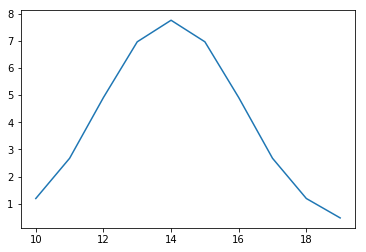

In [3]:
Tmax=20
Tmin=10
t = np.arange(Tmin, Tmax, 1)
kap=10.
tp=12.
sp=1
tm=16.
sm=1
s = fapt(t,kap,tp,sp,tm,sm)
plt.plot(t,s)
plt.show()

In [4]:
from ipywidgets import interact,FloatSlider

def plot(a0, b0, c0, d0):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.35)
    Tmax=20
    Tmin=10
    t = np.arange(Tmin, Tmax, 0.1)
 
    s = sigabcd(t,a0,b0,c0,d0)
    l, = plt.plot(t, s, lw=2, color='red')
    plt.axis([Tmin, Tmax, a0, d0])

    axcolor = 'lightgoldenrodyellow'

    plt.show()

a0 = FloatSlider(min=0,max=1,step=0.1,value=1.)
b0 = FloatSlider(min=0,max=10,step=0.5,value=2.)
c0 = FloatSlider(min=10,max=20,step=0.5,value=14.)
d0 = FloatSlider(min=0,max=1,step=0.1,value=0.)

interact(plot,a0=a0,b0=b0,c0=c0,d0=d0)

interactive(children=(FloatSlider(value=1.0, description='a0', max=1.0), FloatSlider(value=2.0, description='b0', max=10.0, step=0.5), FloatSlider(value=14.0, description='c0', max=20.0, min=10.0, step=0.5), FloatSlider(value=0.0, description='d0', max=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot>